# Project: Investigate a Dataset - [TMDB Movie Data]
<em> Report by Rachel Wilson </em>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this report, we will be exploring the movie data provided by Kaggle. This dataset contains information about different types of movies, ratings, cast information, and revenue. The full list of columns includes the following: 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'.

### Question(s) for Analysis

Some questions that we will explore throughout this analysis will be:

<li>
    <ol> 1. How does the budget for the movies compare to the revenue earned in 2010? Or when adjusted for inflation?</ol>
    <ol> 2. Which movies have the highest popularity and revenue?</ol>
</li>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
% matplotlib inline

# importing necessary libraries and setting up matplotlib

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

In this portion, we are reading the csv file and viewing the first 20 rows. We also configure pandas to show all columns to take a good look at the data. 
We can determine a number of things from this brief overview.
Based on initial findings, we do not need the tagline, keywords, vote count, or homepage.
Additionally, for our research questions, we will need to seperate the production companies into individual values.

In [9]:
df = pd.read_csv('tmdb-movies.csv') ## pulling the csv data 
pd.set_option('display.max_columns', None) # changing the setting on the pd.head() command to display all columns
df.head(5) # displaying the first 5 rows of the dataframe

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now that we understand what needs to be done, we will start gathering additional data about the dataset. Here we look at the shape of the dataset  to confirm the amount of columns and rows.

In [10]:
df.shape # getting the shape of the dataset

(10866, 21)

In this portion, we are gathering basic statistics on the data in order to understand the highest values, lowest values, and mean. This is crucial in order for us to reference as we answer the previously defined questions. We can also see that there are $0 values in revenue. This can cause issues when analyzing the data.

In [11]:
df.describe() # describing common values for the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This is to determine the amount of missing cells and the type of the cells. Here, we can see that homepage, tagline, and keywords are missing data. This further asserts our decision to drop these columns from the dataset.

In [12]:
df.info() # getting the datatypes for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We use this line of code just to determine the full list of columns to reference. 

In [13]:
df.columns # displaying the columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


### Data Cleaning
 

From here, we'll be dropping the columns that we do not need. Then we confirm that the information is gone.

In [14]:
df.drop(['homepage','tagline', 'keywords', 'vote_count'], axis=1, inplace=True) # removing unnecessary columns

In [15]:
df.head() # confirming that the columns are removed

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df.isnull().sum() # checking the amount of nulls values

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are a lot of null values in production companies, but no null values in revenue, budget, or popularity. However, as we've seen as we've been looking at the values, there are values in revenue and budget that are 0. We can replace those values with averages.

In [17]:
df['revenue']= df['revenue'].replace(0,df['revenue'].mean()) # replaces revenue that has 0 to the mean

We can apply this to the budget column and the adjustments for inflation as well.

In [18]:
df['budget']= df['budget'].replace(0,df['budget'].mean()) # these next three lines replace the 0s for budget and the inflation columns.

In [19]:
df['revenue_adj']= df['revenue_adj'].replace(0,df['revenue_adj'].mean())

In [20]:
df['budget_adj']= df['budget_adj'].replace(0,df['budget_adj'].mean())

Now we query to confirm that the change was made. Based on the query, it looks like the change was successful.

In [21]:
df.head(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,8.0,2015,1.609999e+08,7.854116e+08


Here, we define the function to use for creating scatter plots and histograms

In [26]:
def scatter_chart(arg1,arg2):

    """
    Plot a Scatterplot from a set of DataFrame columns, with a title and axis labels.

    Parameters:
    N (int): Random number to help with randomized colors.
    colors (np.random.rand(N)): Sets different colors randomly to each plot point.
    df (pd.DataFrame): The pandas DataFrame containing the data.
    arg1, arg2 (str): The columns used to create the scatterplot.
    title (str): The title of the scatterplot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    
    Returns:
    None
"""
    
    N = 10866
    colors = np.random.rand(N)
    plt.figure(figsize=(12,10)) 
    plt.scatter(x=df[arg1],y=df[arg2],c=colors)
    plt.title(f"The Relation Between {arg1.title()} and {arg2.title()}",fontsize=14)
    plt.xlabel(f"{arg1.title()}",fontsize=12)
    plt.ylabel(f"{arg2.title()}",fontsize=14)
    plt.show()

In [52]:
def histogram_chart(arg1, x, y):

    """
    Plot a histogram from a set of DataFrame columns, with a title and axis labels.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame containing the data.
    arg1, arg2 (str): The columns used to create the plot.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    
    Returns:
    None
"""
    
    plt.figure(figsize=(12,10)) 
    plt.hist(df[arg1])
    plt.title(f" Frequency of {arg1.title()}",fontsize=14)
    plt.xlabel(f"{x}",fontsize=12)
    plt.ylabel(f"{y}",fontsize=14)
    plt.show()

<a id='eda'></a>
## Exploratory Data Analysis



### How does the budget for the movies compare to the revenue earned throughout the years? Or when adjusted for inflation?

First, let's simply look at the revenue data compared to the release years. We can see that as the years go on, revenue begins to increase. Let's see if it's the same for the revenue that is adjusted for inflation.

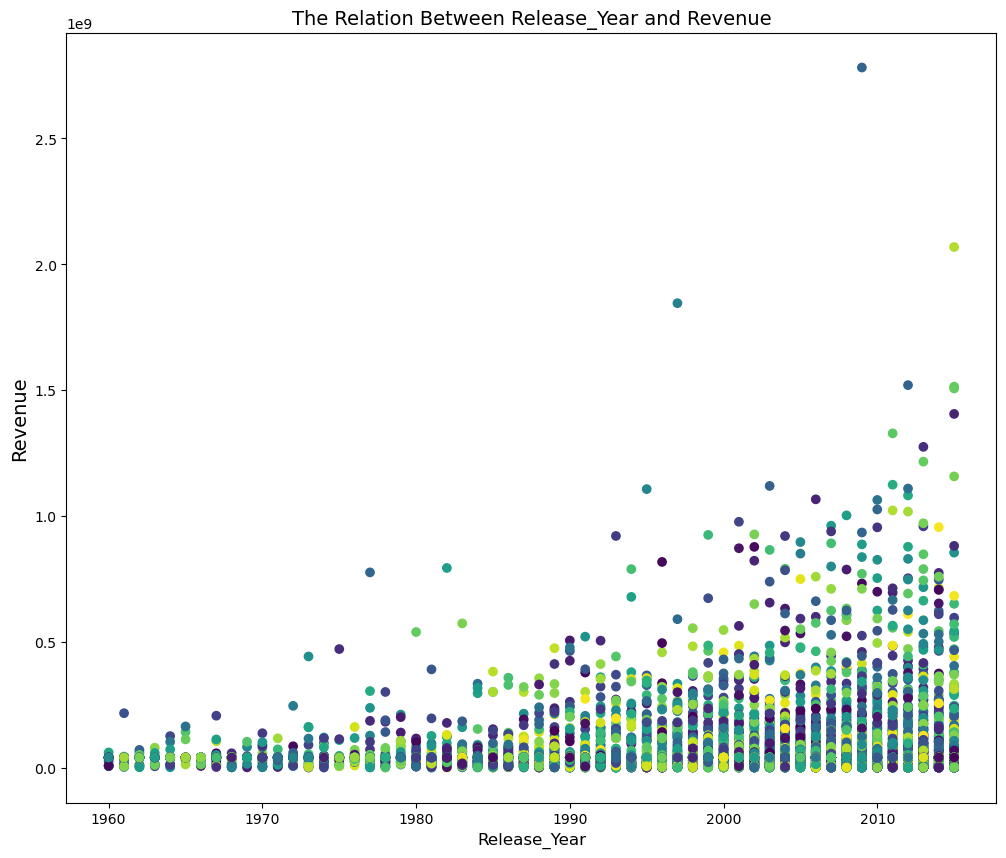

In [53]:
scatter_chart('release_year','revenue')

Based on the scatter plot, the amount of money allocated for movies increased exponentially, as expected. However, considering the difference between the two scatter plots, it's important to consider inflation when judging a movie's revenue.

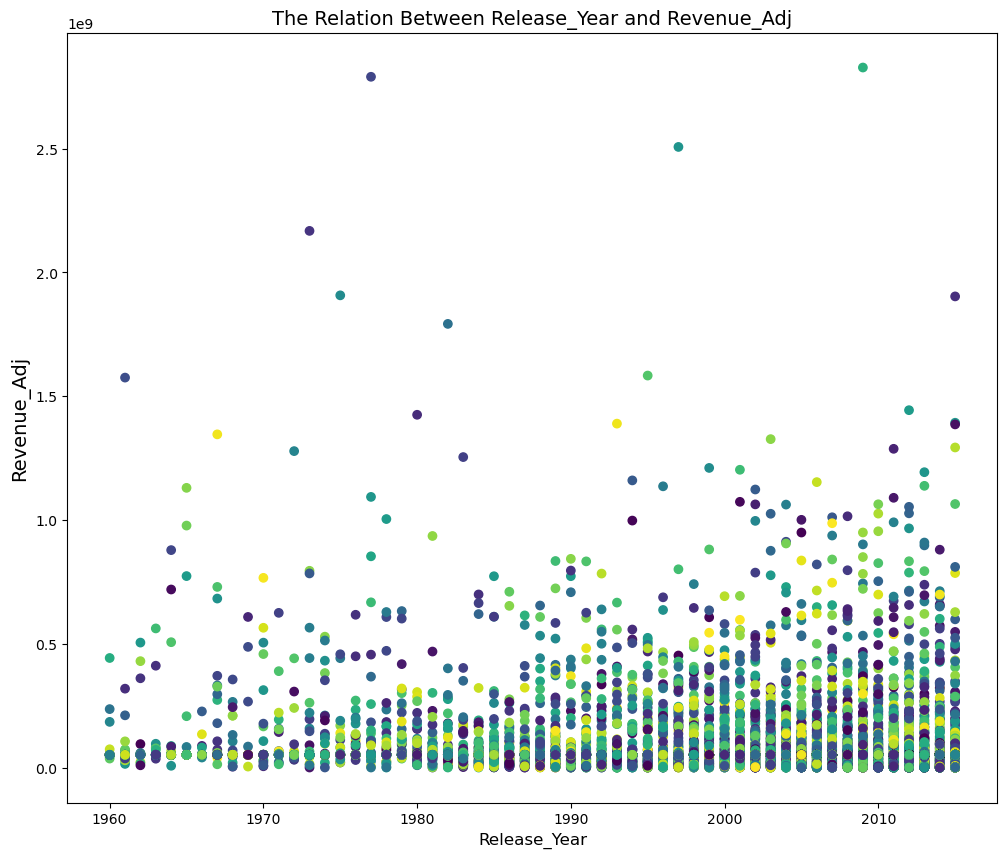

In [30]:
scatter_chart('release_year','revenue_adj')

Now, let's define the parameters to see how the revenue compares to the budget for all movies.

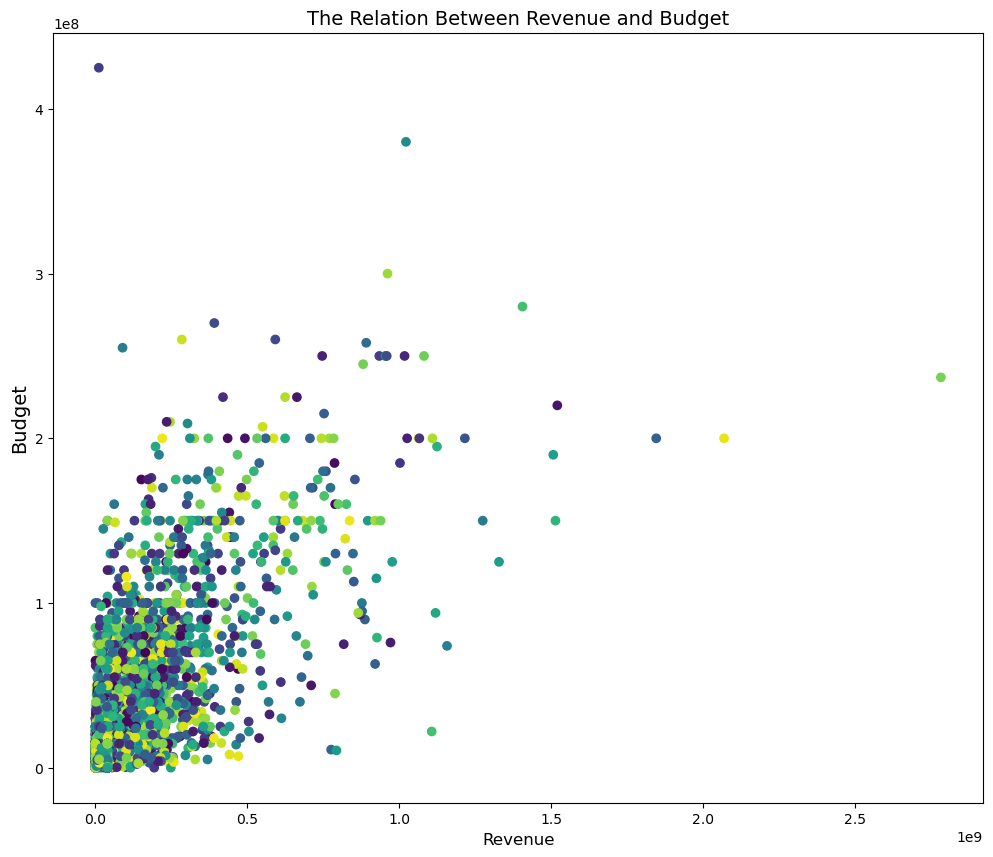

In [31]:
scatter_chart('revenue','budget')

Let's do the same for the inflation values.

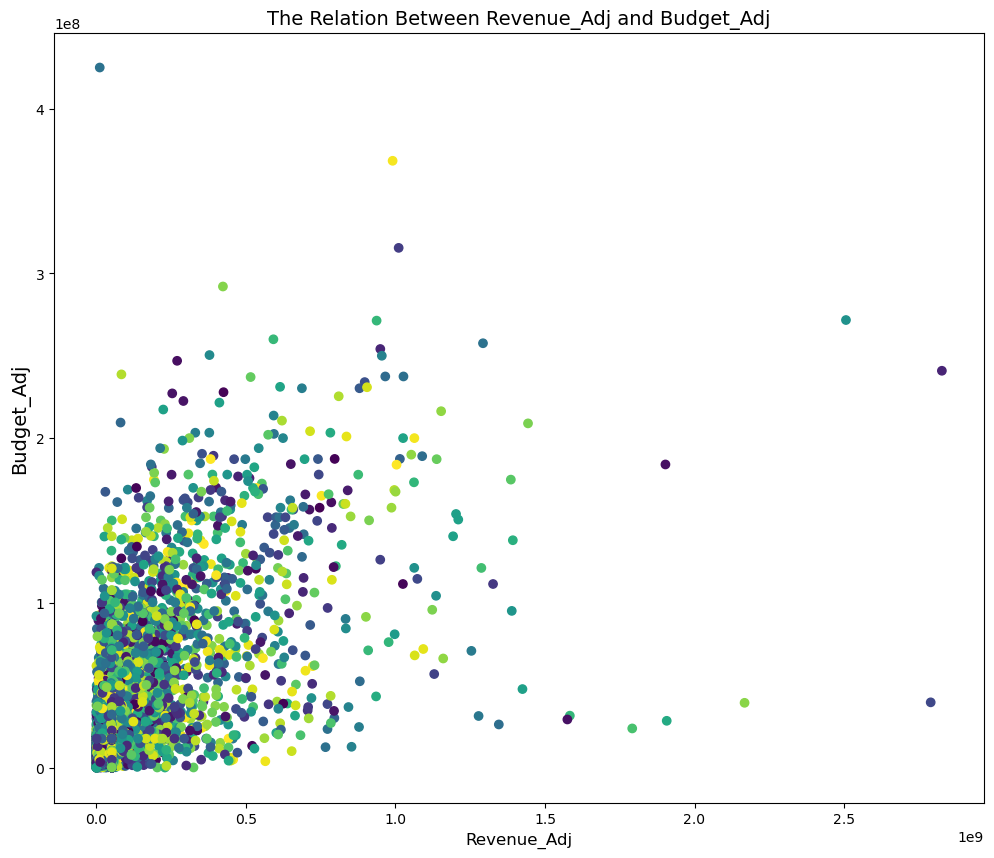

In [32]:
scatter_chart('revenue_adj','budget_adj')

So we can see that it's similar to the previous graph, however it is more widespread when adjusting for inflation. Let's look at the overall frequency for the revenue.

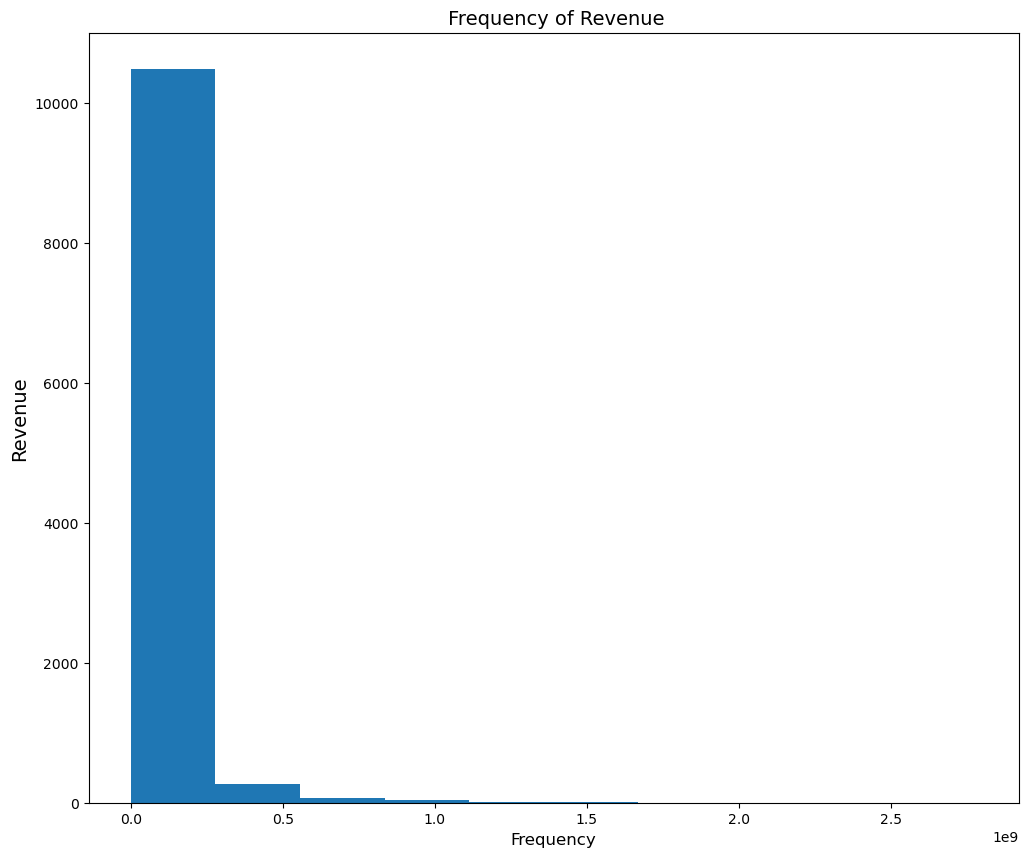

In [54]:
histogram_chart('revenue', 'Frequency', 'Revenue') # Creates a simple histogram of one column.

Now, let's look at the budget.

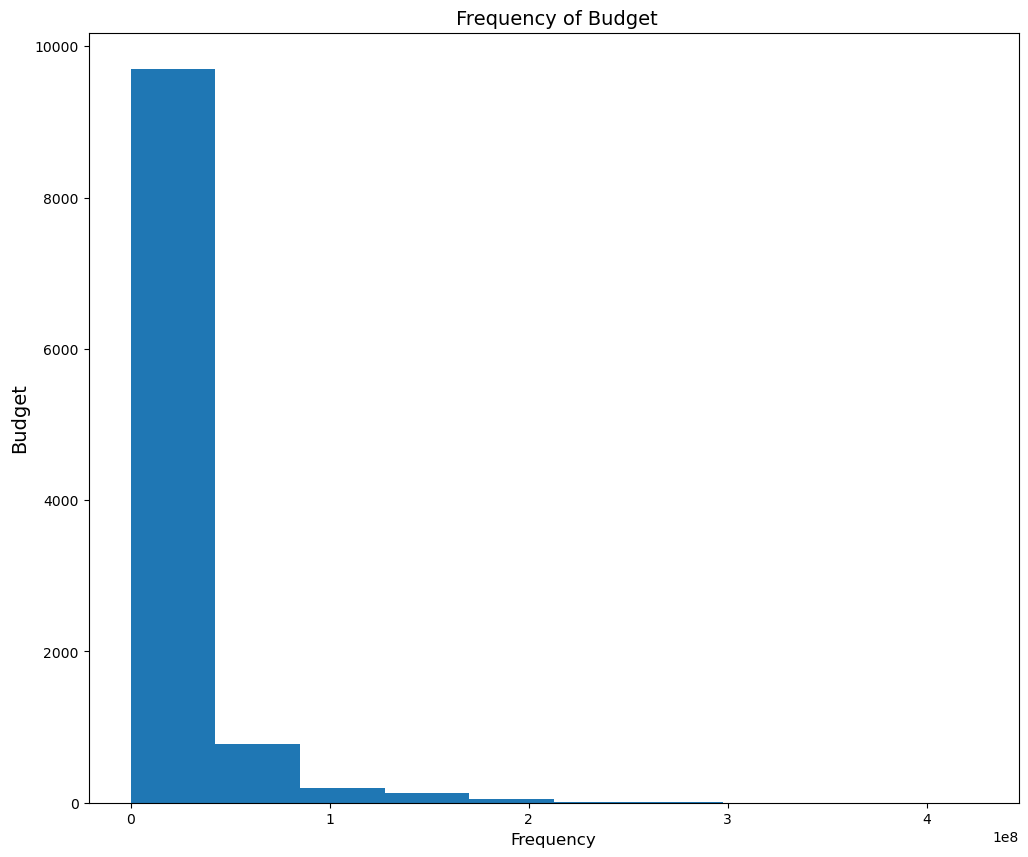

In [55]:
histogram_chart('budget', 'Frequency', 'Budget')

So overall, the frequency of each value is similar, with only slight variations.

### Which movies have the highest popularity and revenue?

To answer this question, we would simply do a query. However, let's also plot the values to see the relationship between popularity and revenue.

In [ ]:
df['popularity'].max() 
# Query to find the max value for popularity. We can confirm this value based off of the previous info gotten in the Wrangling phase.

Based on the max value, we adjust the amounts to get a few movies that are close to the max.

In [ ]:
df.query('popularity >= 32.985763' and 'popularity >= 20.00')

Now, let's look at the popularity adjusted.

In [ ]:
scatter_chart('popularity','revenue')

Let's also plot the data for revenue adjusted.

In [ ]:
scatter_chart('popularity','revenue_adj')

<a id='conclusions'></a>
## Conclusions

In terms of our original research questions, we can see that there is small positive correlation for movies that have a high budget to have high revenue. There are several one off situations where there is a high budget, but low revenue and vice versa.
Based on the amount of budget & revenue that has also grown throughout the years, it's important to consider inflation when using revenue and budget information for old movie data. The scatterplot change was significant enough to effect most conclusions that we would draw from the data.
Then when reviewing the individual variables, we can see that the frequency of each value is very similar.

For the second question, we can confirm that the top 3 most popular movies were Jurassic World, Mad Max: Fury Road, and Interstellar. With Jurassic World.
There is a small positive correlation between revenue and popularity.
We  come across a similar issue like the first question. Based on the data, there is a large number of movies that are incredibly popular, yet did not make as much revenue. There's also several situations that are vice versa, they made a lot of revenue but were not the most popular.

### Limitation

The biggest limitation of our research was the fact that there was a lot of missing data. Using the mean to fill in 0 values was not the most accurate, however it was necessary to keep in a lot of the movies in order to plot them with other values. If we were to get a more complete and thorough dataset, we'd be able to plot a lot of the information more accurately.
